# Support Vector Machines and Kernels

## Marco Túlio S. da Mata 20193007156 - DECOM IC - SVM Lab

## Introduction

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

In [26]:
from __future__ import print_function
import os
data_path = ['data']

## Question 1

* Import the data.
* Create the target variable `y` as a 1/0 column where 1 means red.
* Create a `pairplot` for the dataset.
* Create a bar plot showing the correlations between each column and `y`
* Pick the most 2 correlated fields (using the absolute value of correlations) and create `X`
* Use MinMaxScaler to scale `X`. Note that this will output a np.array. Make it a DataFrame again and rename the columns appropriately.

In [27]:
import pandas as pd
import numpy as np

data = pd.read_csv('Wine_Quality_Data.csv', sep=',')

In [28]:
y = (data['color'] == 'red').astype(int)
fields = list(data.columns[:-1])  # everything except "color"
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

total_sulfur_dioxide   -0.700357
free_sulfur_dioxide    -0.471644
residual_sugar         -0.348821
citric_acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
dtype: float64

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

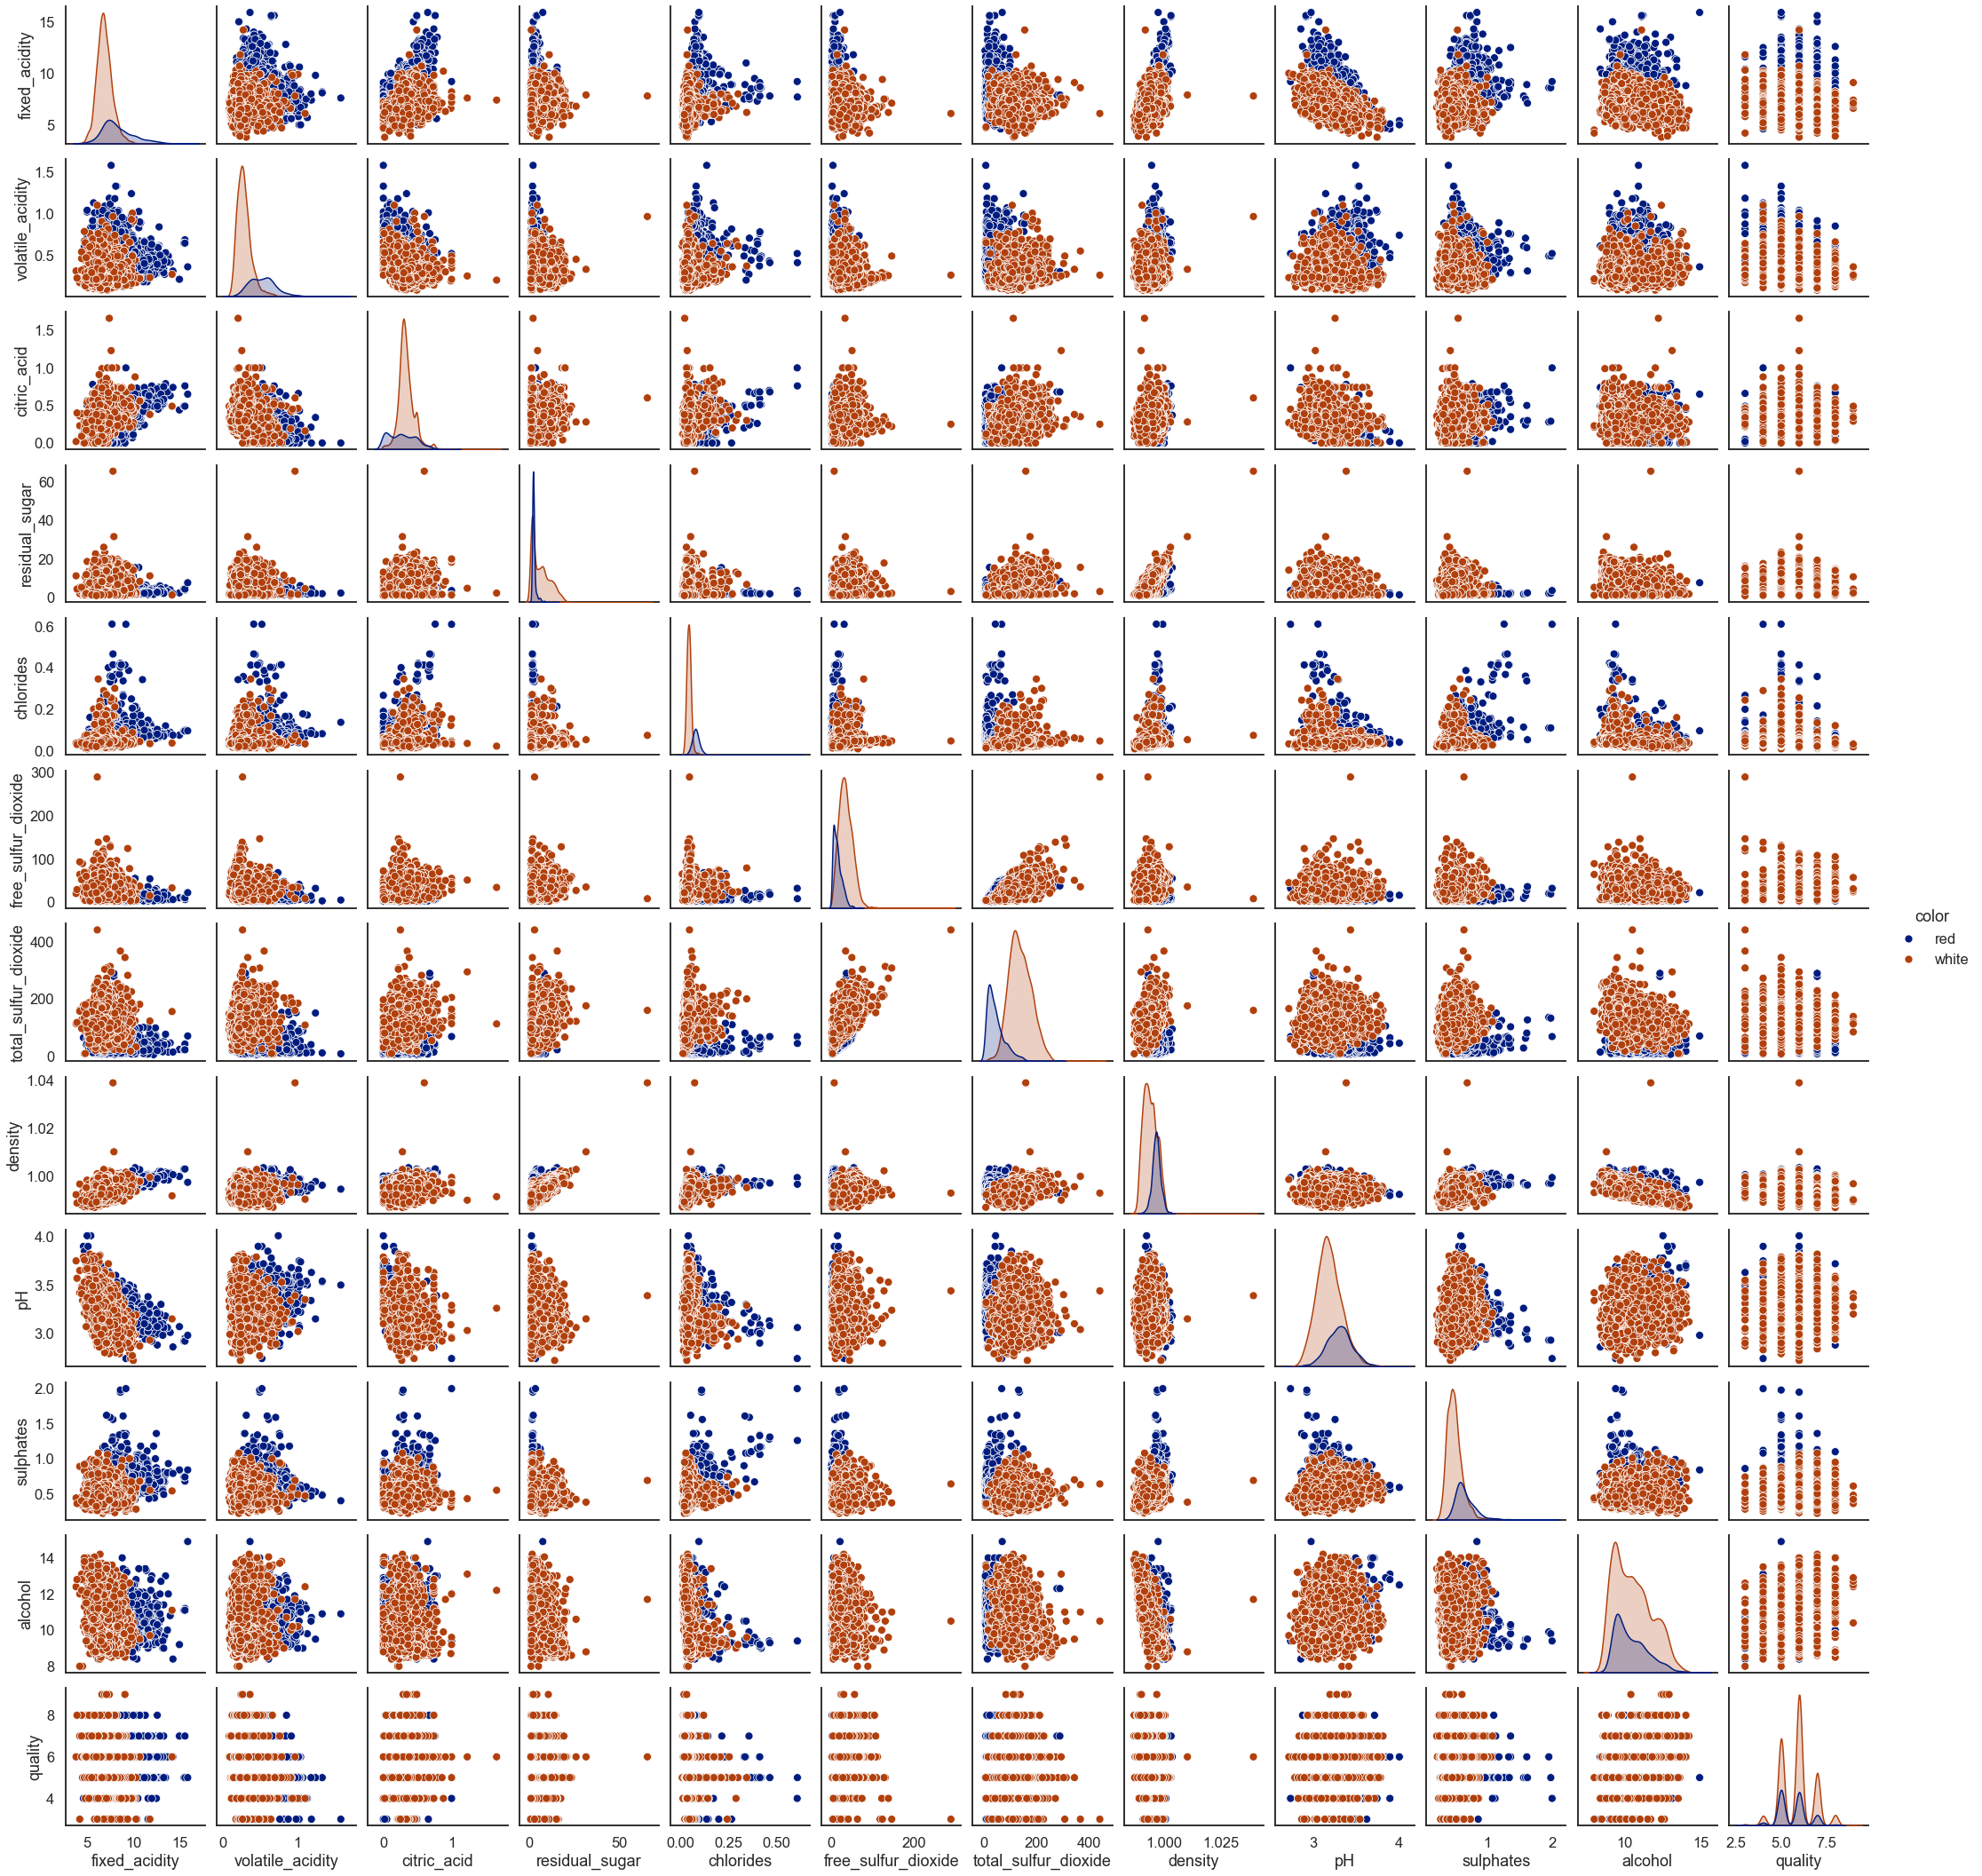

In [30]:
sns.pairplot(data, hue='color')

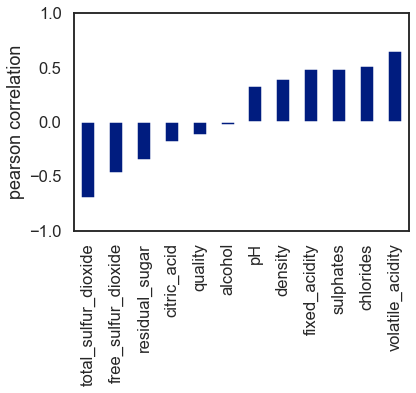

In [31]:
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [32]:
from sklearn.preprocessing import MinMaxScaler

fields = correlations.map(abs).sort_values().iloc[-2:].index
print(fields)
X = data[fields]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])
print(X.columns)

Index(['volatile_acidity', 'total_sulfur_dioxide'], dtype='object')
Index(['volatile_acidity_scaled', 'total_sulfur_dioxide_scaled'], dtype='object')


## Question 2

The goal for this question is to look at the decision boundary of a LinearSVC classifier on this dataset. Check out [this example](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html) in sklearn's documentation. 

* Fit a Linear Support Vector Machine Classifier to `X`, `y`.
* Pick 300 samples from `X`. Get the corresponding `y` value. Store them in variables `X_color` and `y_color`. This is because original dataset is too large and it produces a crowded plot.
* Modify `y_color` so that it has the value "red" instead of 1 and 'yellow' instead of 0.
* Scatter plot X_color's columns. Use the keyword argument "color=y_color" to color code samples.
* Use the code snippet below to plot the decision surface in a color coded way.

```python
x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = *[YOUR MODEL]*.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
```

Feel free to experiment with different parameter choices for LinearSVC and see the decision boundary.

c:\Users\Mark\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Mark\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


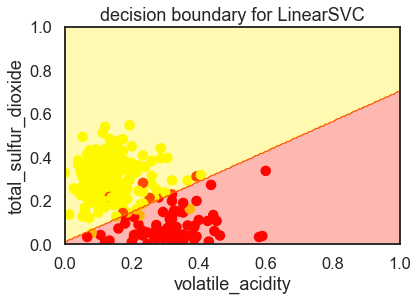

In [33]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC()
LSVC.fit(X, y)

X_color = X.sample(300, random_state=45)
y_color = y.loc[X_color.index]
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
ax = plt.axes()
ax.scatter(
    X_color.iloc[:, 0], X_color.iloc[:, 1],
    color=y_color, alpha=1)
# -----------
x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = LSVC.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
# -----------
ax.set(
    xlabel=fields[0],
    ylabel=fields[1],
    xlim=[0, 1],
    ylim=[0, 1],
    title='decision boundary for LinearSVC');

## Question 3

Let's now fit a Gaussian kernel SVC and see how the decision boundary changes.

* Consolidate the code snippets in Question 2 into one function which takes in an estimator, `X` and `y`, and produces the final plot with decision boundary. The steps are:
    <ol>
     <li> fit model
     <li> get sample 300 records from X and the corresponding y's
     <li> create grid, predict, plot using ax.contourf
     <li> add on the scatter plot
    </ol>
* After copying and pasting code, make sure the finished function uses your input `estimator` and not the LinearSVC model you built.
* For the following values of `gamma`, create a Gaussian Kernel SVC and plot the decision boundary.  
`gammas = [.5, 1, 2, 10]`
* Holding `gamma` constant, for various values of `C`, plot the decision boundary. You may try  
`Cs = [.1, 1, 10]`

In [34]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_boundary(obj, X, y, gamma, C, ax=None):
    # Sample 300 records from X and the corresponding y's.
    X_color = X.sample(300, random_state=45)
    y_color = y.loc[X_color.index]
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'green')

    # Create a grid of points to predict on.
    Xaxis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    XX, YY = np.meshgrid(Xaxis, y_axis)
    XX_ravel = XX.ravel()
    YY_ravel = YY.ravel()

    # Predict on the grid.
    X_grid = pd.DataFrame([XX_ravel, YY_ravel]).T
    y_grid_predictions = obj.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(XX.shape)

    # Add the scatter plot.
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    # Plot the decision boundary.
    ax.contourf(XX, YY, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    
    # Set the axis labels and title.
    ax.set(
    xlabel=fields[0],
    ylabel=fields[1],
    xlim=[0, 1],
    ylim=[0, 1],
    title=f'Decision Boundary Gaussian SVC - Gamma: {gamma} - C: {C}'
    )

    return ax

c:\Users\Mark\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Mark\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Mark\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Mark\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Mark\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\M

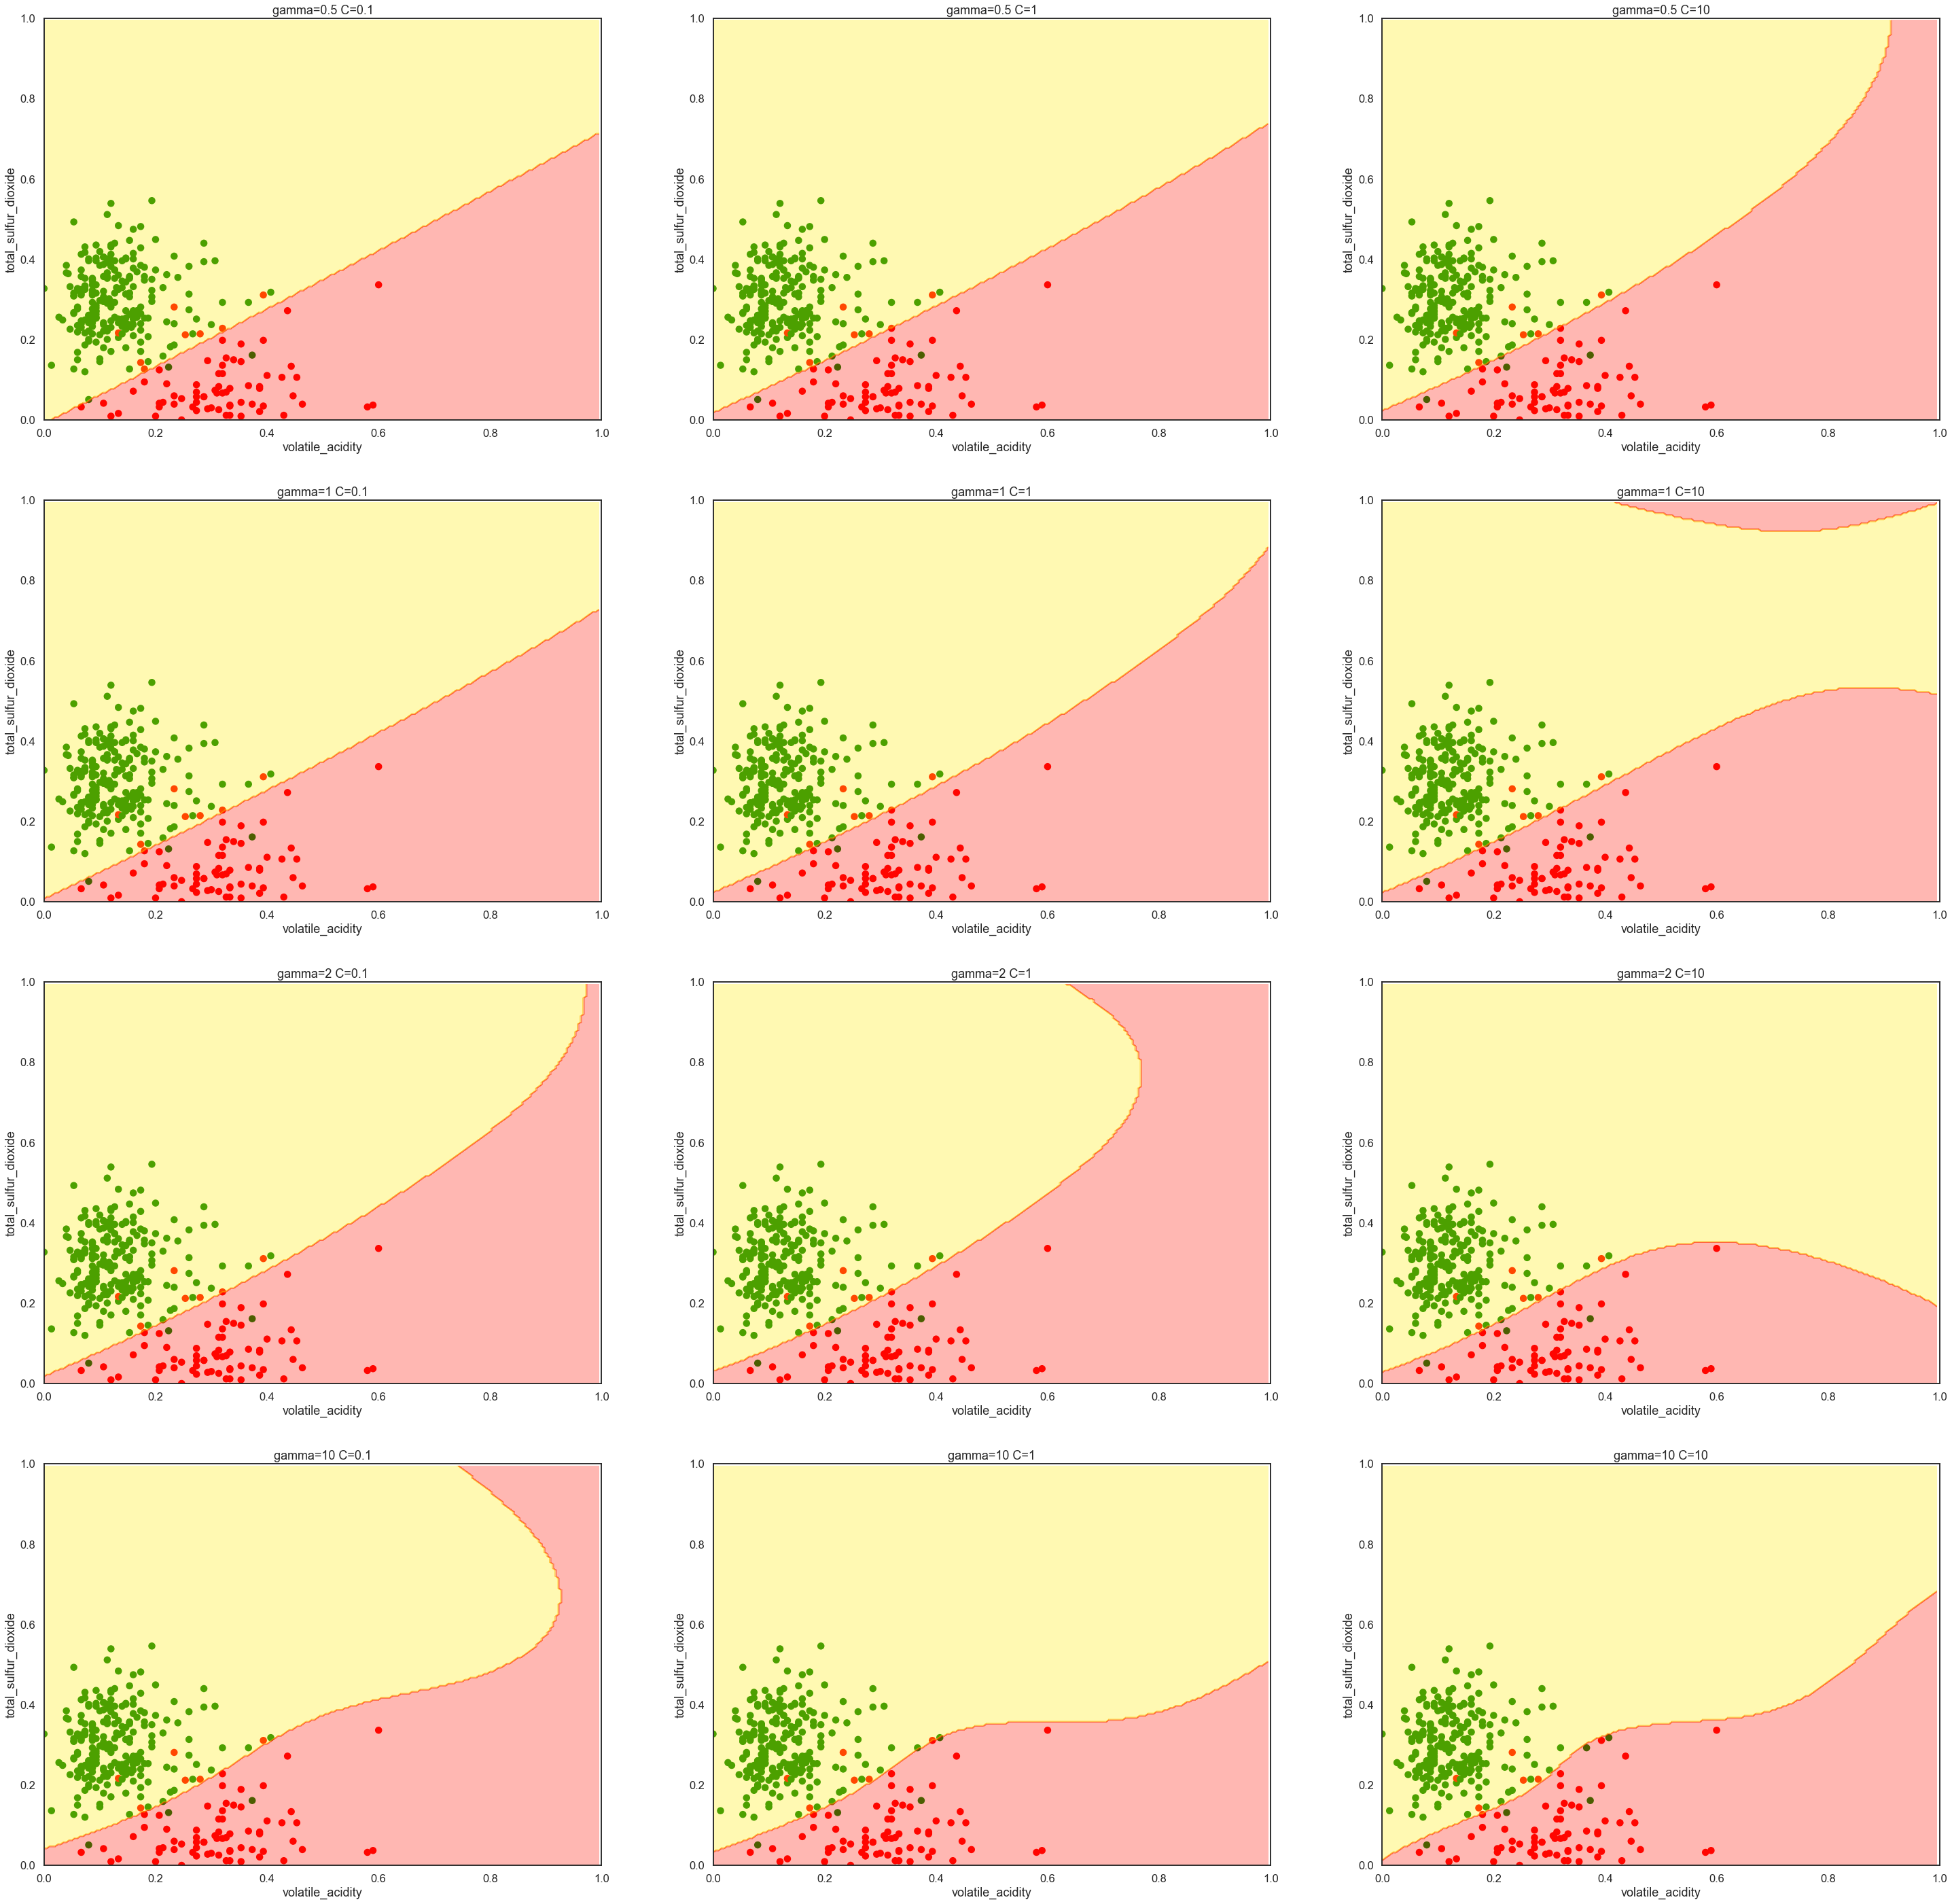

In [35]:
# Init
gammas = [0.5, 1, 2, 10]
Cs = [0.1, 1, 10]

# Create a figure with multiple subplots.
fig, axes = plt.subplots(len(gammas), len(Cs), figsize=(50, 50))

# Iterate over the values of gamma and C.
for i, gamma in enumerate(gammas):
  for j, C in enumerate(Cs):
    # Create a Gaussian Kernel SVC
    gsvc = SVC(kernel='rbf', gamma=gamma, C=C)
    # Model Adjusting
    gsvc.fit(X, y)
    # Call plot
    ax = plot_decision_boundary(gsvc, X, y, gamma, C, ax=axes[i, j])
    # Set the subplot title.
    axes[i, j].set_title('gamma={} C={}'.format(gamma, C))

plt.show()


### Comments:
- Gamma determines the curves more as C does
- Increasing C is proportional to causing overfitting more than as increasing gamma
- gamma = 10 yields a better data separation
- overall good classification

## Question 4

In this question, we will compare the fitting times between SVC vs Nystroem with rbf kernel.  
<br><br>
Jupyter Notebooks provide a useful magic function **`%timeit`** which executes a line and prints out the time it took to fit. If you type **`%%timeit`** in the beginning of the cell, then it will run the whole cell and output the running time.

* Re-load the wine quality data if you made changes to the original.
* Create `y` from data.color, and `X` from the rest of the columns.
* Use `%%timeit` to get the time for fitting an SVC with rbf kernel.
* Use `%%timeit` to get the time for the following: fit_transform the data with Nystroem and then fit a SGDClassifier.

Nystroem+SGD will take much shorter to fit. This difference will be more pronounced if the dataset was bigger.

* Make 5 copies of X and concatenate them
* Make 5 copies of y and concatenate them
* Compare the time it takes to fit the both methods above

In [44]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

y = data.color == 'red'
X = data[data.columns[:-1]]

kwargs = {'kernel': 'rbf'}
svc = SVC(**kwargs)
nystroem = Nystroem(**kwargs)
sgd = SGDClassifier()

In [45]:
%%timeit
svc.fit(X, y)

600 ms ± 161 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
%timeit
svc.score(X, y)

0.9368939510543328

In [47]:
%%timeit
X_transformed = nystroem.fit_transform(X)
sgd.fit(X_transformed, y)

114 ms ± 25.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [48]:
%timeit
sgd.score(nystroem.fit_transform(X), y)

0.7631214406649223

In [49]:
X2 = pd.concat([X]*5)
y2 = pd.concat([y]*5)

print(X2.shape)
print(y2.shape)

(32485, 12)
(32485,)


In [50]:
%timeit 
svc.fit(X2, y2)

SVC()

In [51]:
%timeit
svc.score(X2, y2)

0.9442819762967524

In [52]:
%%timeit
X2_transformed = nystroem.fit_transform(X2)
sgd.fit(X2_transformed, y2)

560 ms ± 206 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [53]:
%timeit
sgd.score(nystroem.fit_transform(X2), y2)

0.7500384792981376

Comment:

- Increase in Execution Time: SVC showed a significant increase in execution time, approximately 20 times, going from 200 ms to 4.7 s. In contrast, the Nystroem SGD method had a smaller increase, of approximately 4 times, remaining in the order of milliseconds (40 ms to 151 ms).

- Performance Comparison: Although SVC obtained a superior score, with a difference of 0.8 in both cases analyzed, the much shorter execution time of Nystroem SGD may be a determining factor in choosing the model.

- Consideration of Training Cost: If the computational cost of training is a concern, Nystroem SGD is the best option. Despite presenting a lower score, its considerably faster execution can compensate for the difference in performance.